starting the project with importing libraries and reading the csv file

In [17]:
import pandas as pd
import seaborn as sns

In [18]:
data=pd.read_csv("./Food_Security_Data_E_All_Data_(Normalized)/Food_Security_Data_E_All_Data_(Normalized).csv",low_memory=False)
data.shape

(278940, 13)

taking a look at our data

In [19]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278940 entries, 0 to 278939
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Area Code        278940 non-null  int64 
 1   Area Code (M49)  278940 non-null  object
 2   Area             278940 non-null  object
 3   Item Code        278940 non-null  object
 4   Item             278940 non-null  object
 5   Element Code     278940 non-null  int64 
 6   Element          278940 non-null  object
 7   Year Code        278940 non-null  int64 
 8   Year             278940 non-null  object
 9   Unit             274691 non-null  object
 10  Value            240921 non-null  object
 11  Flag             278940 non-null  object
 12  Note             41790 non-null   object
dtypes: int64(3), object(10)
memory usage: 27.7+ MB


make the value numiric

In [20]:
print(data["Value"].unique())
data["Value"]=pd.to_numeric(data["Value"],errors='coerce')
data.info()

['87' '88' '91' ... '168.5' '164.9' '182']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278940 entries, 0 to 278939
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        278940 non-null  int64  
 1   Area Code (M49)  278940 non-null  object 
 2   Area             278940 non-null  object 
 3   Item Code        278940 non-null  object 
 4   Item             278940 non-null  object 
 5   Element Code     278940 non-null  int64  
 6   Element          278940 non-null  object 
 7   Year Code        278940 non-null  int64  
 8   Year             278940 non-null  object 
 9   Unit             274691 non-null  object 
 10  Value            223844 non-null  float64
 11  Flag             278940 non-null  object 
 12  Note             41790 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 27.7+ MB


testing the pivot transformation on just one country

In [21]:
Afghanistan = data[data["Area Code"]==2]
Afghanistan.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20002002,2000-2002,%,87.0,E,NaN
1,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20012003,2001-2003,%,88.0,E,NaN
2,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20022004,2002-2004,%,91.0,E,NaN
3,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20032005,2003-2005,%,93.0,E,NaN
4,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20042006,2004-2006,%,95.0,E,NaN


In [22]:
Afghanistan=Afghanistan[["Item","Year","Value"]]
Afghanistan.head()

,Item,Year,Value
0,Average dietary energy supply adequacy (percen...,2000-2002,87.0
1,Average dietary energy supply adequacy (percen...,2001-2003,88.0
2,Average dietary energy supply adequacy (percen...,2002-2004,91.0
3,Average dietary energy supply adequacy (percen...,2003-2005,93.0
4,Average dietary energy supply adequacy (percen...,2004-2006,95.0


In [23]:
# Create a pivot table with Item Code as columns
Afghanistan_pivot = Afghanistan.pivot_table(
    index='Year', 
    columns='Item', 
    values='Value', 
    aggfunc='mean'  # or 'mean' if there are multiple values per year-item combination
)

# Reset index to make Year a regular column
Afghanistan_pivot = Afghanistan_pivot.reset_index()

Afghanistan_pivot.head()

Item,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average),...,Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older) (percent),Prevalence of severe food insecurity in the female adult population (percent) (3-year average),Prevalence of severe food insecurity in the male adult population (percent) (3-year average),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,2000,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-2002,NaN,87.0,29.7,51.9,13.4,34.1,NaN,NaN,1762.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.8,77.0,240.0
2,2001,2020.0,NaN,NaN,NaN,NaN,NaN,0.31,1716.0,NaN,...,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-2003,NaN,88.0,29.0,52.5,12.8,29.4,NaN,NaN,1788.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.5,78.0,281.0
4,2002,2025.0,NaN,NaN,NaN,NaN,NaN,0.30,1794.0,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Afghanistan_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 46 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Year                                                                                                                48 non-null     object 
 1   Average dietary energy requirement (kcal/cap/day)                                                                   25 non-null     float64
 2   Average dietary energy supply adequacy (percent) (3-year average)                                                   23 non-null     float64
 3   Average fat supply (g/cap/day) (3-year average)                                                                     21 non-null     float64
 4   Average protein supply

making the pivot transformation on all the data

In [25]:
data=data[["Area Code","Item","Year","Value"]]
data.head()

,Area Code,Item,Year,Value
0,2,Average dietary energy supply adequacy (percen...,2000-2002,87.0
1,2,Average dietary energy supply adequacy (percen...,2001-2003,88.0
2,2,Average dietary energy supply adequacy (percen...,2002-2004,91.0
3,2,Average dietary energy supply adequacy (percen...,2003-2005,93.0
4,2,Average dietary energy supply adequacy (percen...,2004-2006,95.0


In [26]:
# Create a pivot table with both Area Code and Year as index
data_pivot = data.pivot_table(
    index=['Area Code', 'Year'], 
    columns='Item', 
    values='Value', 
    aggfunc='mean'  # Use mean if there are multiple values per combination
)

# Reset index to make Area Code and Year regular columns
data_pivot = data_pivot.reset_index()

data_pivot.head()

Item,Area Code,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),...,Prevalence of severe food insecurity in the rural adult population (percent) (annual value),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of severe food insecurity in the total population (percent) (annual value),Prevalence of severe food insecurity in the town and semi-dense area adult population (percent) (annual value),Prevalence of severe food insecurity in the urban adult population (percent) (annual value),Prevalence of undernourishment (percent) (3-year average),Prevalence of undernourishment (percent) (annual value),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,1,2000,2384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN
1,1,2000-2002,NaN,92.0,44.3,65.6,21.3,61.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.6,NaN,NaN,60.0,42.0
2,1,2001,2401.0,NaN,NaN,NaN,NaN,NaN,0.23,2211.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN
3,1,2001-2003,NaN,94.0,49.6,67.2,23.2,53.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.9,NaN,NaN,57.0,31.0
4,1,2002,2416.0,NaN,NaN,NaN,NaN,NaN,0.24,2233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN


In [27]:
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 71 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Area Code                                                                                                                   11753 non-null  int64  
 1   Year                                                                                                                        11753 non-null  object 
 2   Average dietary energy requirement (kcal/cap/day)                                                                           5999 non-null   float64
 3   Average dietary energy supply adequacy (percent) (3-year average)                                                        

handeling the messing values

In [28]:
# Calculate missing percentage for each column
missing_percentage = (data_pivot.isnull().sum() / len(data_pivot)) * 100
print("Missing data percentage per column:")
print(missing_percentage.sort_values(ascending=False))

# Identify columns with 50% or more missing values
high_missing_cols = missing_percentage[missing_percentage >= 70].index.tolist()
print(f"\nColumns with 70%+ missing data: {len(high_missing_cols)}")
print(high_missing_cols)

Missing data percentage per column:
Item
Prevalence of moderate or severe food insecurity in the rural adult population (percent) (annual value)                       98.902408
Prevalence of severe food insecurity in the town and semi-dense area adult population (percent) (annual value)                98.902408
Prevalence of moderate or severe food insecurity in the town and semi-dense area adult population (percent) (annual value)    98.902408
Prevalence of moderate or severe food insecurity in the urban adult population (percent) (annual value)                       98.902408
Prevalence of severe food insecurity in the urban adult population (percent) (annual value)                                   98.902408
                                                                                                                                ...    
Gross domestic product per capita, PPP, (constant 2021 international $)                                                       50.421169
Minimum

In [29]:
data_pivot = data_pivot.drop(columns=high_missing_cols)
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 31 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Area Code                                                                                                           11753 non-null  int64  
 1   Year                                                                                                                11753 non-null  object 
 2   Average dietary energy requirement (kcal/cap/day)                                                                   5999 non-null   float64
 3   Average dietary energy supply adequacy (percent) (3-year average)                                                   4866 non-null   float64
 4   Average fat supp

filing the missing data with the avrage of the country

In [30]:
# Fill missing values with area code mean for each indicator (Item Code)
for col in data_pivot.columns:
    if col not in ['Area Code', 'Year']:  # Skip non-indicator columns
        data_pivot[col] = data_pivot.groupby('Area Code')[col].transform(
            lambda x: x.fillna(x.mean())
        )

# Check the result
print("Missing data after filling with area code means:")
missing_after = (data_pivot.isnull().sum() / len(data_pivot)) * 100
print(missing_after.sort_values(ascending=False))

Missing data after filling with area code means:
Item
Percentage of population using safely managed drinking water services (percent)                                       36.833149
Percentage of population using safely managed sanitation services (percent)                                           34.544372
Coefficient of variation of habitual caloric consumption distribution (real number)                                   30.800647
Prevalence of undernourishment (percent) (3-year average)                                                             28.341700
Number of women of reproductive age (15-49 years) affected by anemia (million)                                        21.832724
Political stability and absence of violence/terrorism (index)                                                         21.390283
Incidence of caloric losses at retail distribution level (percent)                                                    18.778184
Prevalence of low birthweight (percent)           

In [31]:
data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 31 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Area Code                                                                                                           11753 non-null  int64  
 1   Year                                                                                                                11753 non-null  object 
 2   Average dietary energy requirement (kcal/cap/day)                                                                   11421 non-null  float64
 3   Average dietary energy supply adequacy (percent) (3-year average)                                                   10245 non-null  float64
 4   Average fat supp

drop the remaining rows that have null values

In [32]:
# Drop rows that still have missing values
data_pivot = data_pivot.dropna()

# Check the result
print("Shape after dropping rows with missing values:")
print(data_pivot.shape)
print("\nMissing data after dropping rows:")
missing_final = (data_pivot.isnull().sum() / len(data_pivot)) * 100
print(missing_final.sort_values(ascending=False))

Shape after dropping rows with missing values:
(2304, 31)

Missing data after dropping rows:
Item
Area Code                                                                                                             0.0
Per capita food supply variability (kcal/cap/day)                                                                     0.0
Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)                      0.0
Prevalence of undernourishment (percent) (3-year average)                                                             0.0
Prevalence of obesity in the adult population (18 years and older) (percent)                                          0.0
Prevalence of low birthweight (percent)                                                                               0.0
Prevalence of anemia among women of reproductive age (15-49 years) (percent)                                          0.0
Political stability and absence of violence/terr

finding the target and normalizing it

In [34]:
data_pivot.columns

Index(['Area Code', 'Year',
       'Average dietary energy requirement (kcal/cap/day)',
       'Average dietary energy supply adequacy (percent) (3-year average)',
       'Average fat supply (g/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Coefficient of variation of habitual caloric consumption distribution (real number)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day)',
       'Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2021 international $)',
       'Incidence of caloric losses at retail distribution level (percent)',
       'Minimum dietary energy requirement  (kcal/cap/day)',
       'Number of o

In [35]:
data_pivot['Prevalence of undernourishment (percent) (3-year average)']

0       15.455556
1       28.600000
2       15.455556
3       26.900000
4       15.455556
          ...    
9372     3.800000
9373     3.800000
9374     3.800000
9375     3.800000
9376     3.800000
Name: Prevalence of undernourishment (percent) (3-year average), Length: 2304, dtype: float64

<Axes: xlabel='Food_Security_Category'>

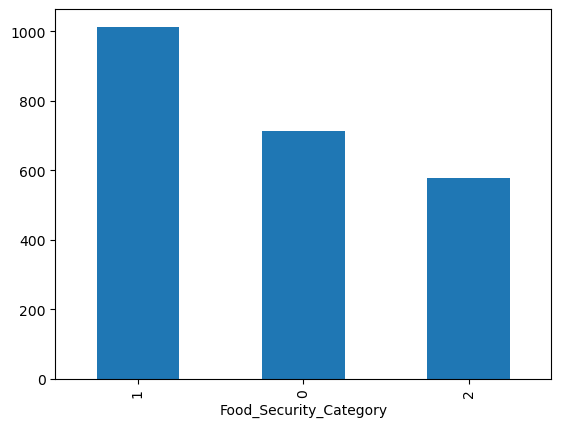

In [ ]:
#low=0,medium=1,high = 2
def categorize_food_security(undernourishment_pct):
    if undernourishment_pct < 5:
        return 0
    elif undernourishment_pct <= 15:
        return 1
    else:
        return 2

data_pivot['Food_Security_Category'] = data_pivot['Prevalence of undernourishment (percent) (3-year average)'].apply(categorize_food_security)
data_pivot['Food_Security_Category'].value_counts().plot(kind="bar")

In [43]:
data_pivot.drop('Prevalence of undernourishment (percent) (3-year average)',axis=1)

Item,Area Code,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),Dietary energy supply used in the estimation of the prevalence of undernourishment (kcal/cap/day),...,Percentage of population using at least basic sanitation services (percent),Percentage of population using safely managed drinking water services (percent),Percentage of population using safely managed sanitation services (percent),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years) (percent),Prevalence of low birthweight (percent),Prevalence of obesity in the adult population (18 years and older) (percent),"Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),Food_Security_Category
0,1,2000,2384.00,121.739130,87.3,93.190476,41.72381,59.081818,0.221304,2968.217391,...,87.000000,82.000000,15.000000,-0.680000,17.800000,8.900000,15.300000,44.666667,35.272727,2
1,1,2000-2002,2435.24,92.000000,44.3,65.600000,21.30000,61.700000,0.221304,2968.217391,...,91.043478,82.826087,12.695652,-0.252273,18.495833,8.371429,19.882609,60.000000,42.000000,2
2,1,2001,2401.00,121.739130,87.3,93.190476,41.72381,59.081818,0.230000,2211.000000,...,87.000000,82.000000,15.000000,-0.252273,17.900000,8.800000,15.700000,44.666667,35.272727,2
3,1,2001-2003,2435.24,94.000000,49.6,67.200000,23.20000,53.900000,0.221304,2968.217391,...,91.043478,82.826087,12.695652,-0.252273,18.495833,8.371429,19.882609,57.000000,31.000000,2
4,1,2002,2416.00,121.739130,87.3,93.190476,41.72381,59.081818,0.240000,2233.000000,...,88.000000,83.000000,14.000000,-0.260000,18.200000,8.700000,16.100000,44.666667,35.272727,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,272,2021-2023,2493.36,148.000000,93.0,106.137500,49.46875,-41.600000,0.202609,3252.086957,...,96.826087,74.739130,27.739130,-0.319545,21.483333,6.014286,18.069565,45.000000,9.000000,0
9373,272,2022,2480.00,130.608696,93.0,106.137500,49.46875,-48.582353,0.210000,3680.000000,...,98.000000,75.000000,25.000000,-0.170000,24.200000,6.014286,22.500000,45.000000,8.823529,0
9374,272,2022-2024,2493.36,148.000000,93.0,106.137500,49.46875,-48.582353,0.202609,3252.086957,...,96.826087,74.739130,27.739130,-0.319545,21.483333,6.014286,18.069565,45.000000,8.823529,0
9375,272,2023,2480.00,130.608696,93.0,106.137500,49.46875,-48.582353,0.210000,3658.000000,...,96.826087,74.739130,27.739130,-0.319545,24.900000,6.014286,18.069565,45.000000,8.823529,0


removing the target from the rest of the data
removing the colomns that does not effect the prdiction

In [46]:
y = data_pivot["Food_Security_Category"]
x= data_pivot.drop(["Food_Security_Category","Area Code","Year"],axis=1)

scaling the data 

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler= scaler.fit_transform(x)
x_scaler

array([[ 0.49085612,  0.21984266,  0.49747088, ...,  0.56991598,
        -0.57511217,  0.15814985],
       [ 0.97558689, -2.35612959, -1.26846071, ...,  2.2106843 ,
         0.60129515,  0.30154658],
       [ 0.65167625,  0.21984266,  0.49747088, ...,  0.56991598,
        -0.57511217,  0.15814985],
       ...,
       [ 1.52540251,  2.49453161,  0.73155949, ..., -0.88500031,
        -0.5495381 , -0.40563412],
       [ 1.39901681,  0.98811509,  0.73155949, ..., -0.88500031,
        -0.5495381 , -0.40563412],
       [ 1.38955681,  0.98811509,  0.73155949, ..., -0.88500031,
        -0.5495381 , -0.40563412]])

split the data between training and test

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_scaler,y,test_size=0.30,random_state=22)

train the logistic regression model

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2,
       0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2,
       2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0,
       1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 1, 1,

checking its accuracy

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.98


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       222
           1       0.97      0.98      0.98       302
           2       0.99      0.98      0.98       168

    accuracy                           0.98       692
   macro avg       0.98      0.98      0.98       692
weighted avg       0.98      0.98      0.98       692

